# Building A Handwritten Digits Classifier

In this project, we'll:

- explore why image classification is a hard task
- observe the limitations of traditional machine learning models for image classification
- train, test, and improve a few different deep neural networks for image classification

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# load data from load_digits()
features, labels = load_digits(return_X_y= True)
features_df = pd.DataFrame(features) #transform to dataframe and series
labels_df = pd.Series(labels)
print(features_df.head(10))
print(labels_df.head(10))

    0    1     2     3     4     5     6    7    8    9   ...   54   55   56  \
0  0.0  0.0   5.0  13.0   9.0   1.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0   0.0  12.0  13.0   5.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0   0.0   4.0  15.0  12.0   0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0   7.0  15.0  13.0   1.0   0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0   0.0   1.0  11.0   0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5  0.0  0.0  12.0  10.0   0.0   0.0   0.0  0.0  0.0  0.0  ...  4.0  0.0  0.0   
6  0.0  0.0   0.0  12.0  13.0   0.0   0.0  0.0  0.0  0.0  ...  8.0  0.0  0.0   
7  0.0  0.0   7.0   8.0  13.0  16.0  15.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
8  0.0  0.0   9.0  14.0   8.0   1.0   0.0  0.0  0.0  0.0  ...  8.0  0.0  0.0   
9  0.0  0.0  11.0  12.0   0.0   0.0   0.0  0.0  0.0  2.0  ...  4.0  0.0  0.0   

    57    58    59    60    61   62   63  
0  0.0   6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0   0.0  11.0  16.0  10.0  0

We will now use visualize a sample of the images in the dataset. 

In [7]:
rows = [0, 99, 199, 299, 999, 1099, 1199, 1299]
print(rows[3])
print(rows[3+4])
for i in range(0,4):
    print(i)

299
1299
0
1
2
3


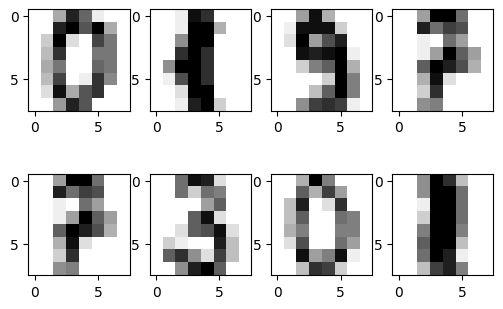

In [10]:
rows = [0, 99, 199, 299, 999, 1099, 1199, 1299]
f, axarr = plt.subplots(2, 4)

for j in range(0,4):
    axarr[0, j].imshow(features_df.iloc[rows[j]].values.reshape(8, 8), 
                       cmap = 'gray_r')
    axarr[1, j].imshow(features_df.iloc[rows[j+3]].values.reshape(8, 8), 
                       cmap = 'gray_r')

## K-Nearest Neighbors Mode

We will now use the k-nearest neighbors algorithm to find a model to fit our data. We are using the k-nearest neighbors because it does not make any assumption about the linearity between the features and the output labels, as opposed to linear and logistic regression models. This allows the k-nearest neighbor algorithm to capture nonlinearity in the data.

In [11]:
# Training k-nearest neighbors models.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
   
# function for performing a 4-fold cross validation using train() and test()
def cross_validate(features, labels, n):
    kf = KFold(n_splits = 4, random_state = 1)
    accuracy_scores = []
    # Split data
    for train_split, test_split in kf.split(features, labels):
        X_train, X_test = features.loc[train_split], features.loc[test_split]
        y_train, y_test = labels.loc[train_split], labels.loc[test_split]
        # Train & predict with each fold 
        knn = KNeighborsClassifier(n_neighbors = n)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        accuracy = accuracy_score(y_test, predictions, normalize = True)
        accuracy_scores.append(accuracy)
    return accuracy_scores     
    
    

In [12]:
# Experiment average recall score with different k(s)
k_num = range(1, 20)
avg_accuracy = []
for n in k_num:
    scores = cross_validate(features_df, labels_df, n)
    avg_accuracy.append(np.mean(scores))

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect s

(1.0, 19.0)

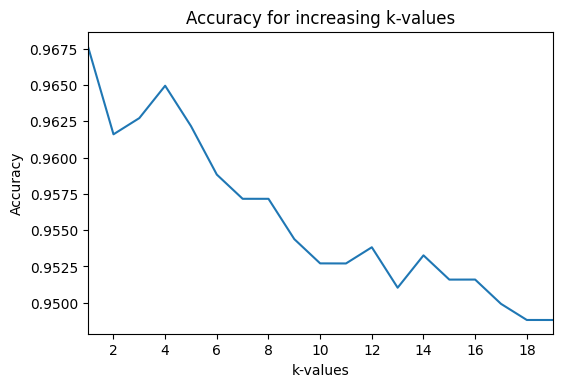

In [13]:
# Visualize K, recall score correlation
plt.plot(k_num, avg_accuracy)
plt.title('Accuracy for increasing k-values')
plt.xlabel('k-values')
plt.ylabel('Accuracy')
plt.xlim(1, 19)


## Neural Network With One Hidden Layer



In [14]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(1,), activation='logistic')

def cross_validate(features, labels, neuron_size):
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    accuracy_scores = []
    # Split data
    for train_split, test_split in kf.split(features, labels):
        X_train, X_test = features.loc[train_split], features.loc[test_split]
        y_train, y_test = labels.loc[train_split], labels.loc[test_split]
        # Train & predict with each fold 
        mlp = MLPClassifier(hidden_layer_sizes=neuron_size)
        mlp.fit(X_train, y_train)
        predictions = mlp.predict(X_test)
        accuracy = accuracy_score(y_test, predictions, normalize = True)
        accuracy_scores.append(accuracy)
    return accuracy_scores     


In [15]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(features_df, labels_df, n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

Text(0, 0.5, 'Accuracy')

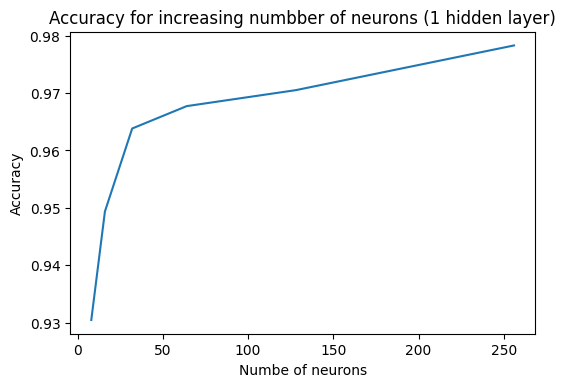

In [24]:
# visualize accuracy
plt.plot(nn_one_neurons, nn_one_accuracies)
plt.title('Accuracy for increasing numbber of neurons (1 hidden layer)')
plt.xlabel('Numbe of neurons')
plt.ylabel('Accuracy')


It looks like adding more neurons to the single hidden layer improved simple accuracy to approximately 97%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 98% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

(rephrase)

### Neural Network With Two Hidden Layers

In [23]:
nn_two_neurons = [
    (64,64),
    (128,128),
    (256,256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(features_df, labels_df, n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

Text(0, 0.5, 'Accuracy')

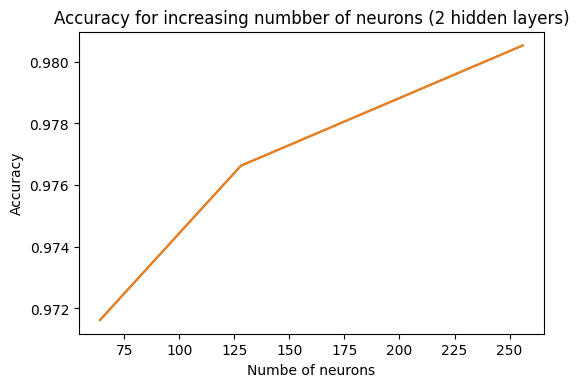

In [25]:
# visualize accuracy
plt.plot(nn_two_neurons, nn_two_accuracies)
plt.title('Accuracy for increasing numbber of neurons (2 hidden layers)')
plt.xlabel('Numbe of neurons')
plt.ylabel('Accuracy')

Using 2 hidden layers improved our simple accuracy to 98%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

(rephrase)

### Neural Network With Three Hidden Layers

In [27]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate(features_df, labels_df, n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Text(0, 0.5, 'Accuracy')

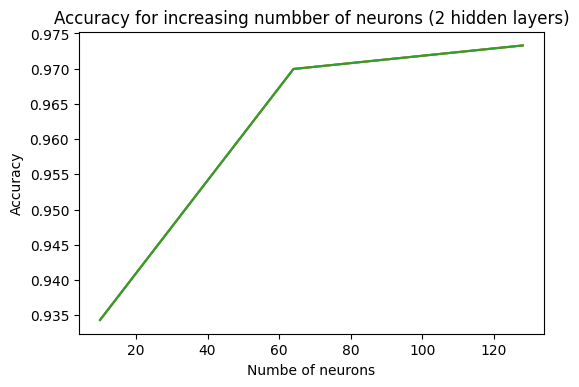

In [28]:
# visualize accuracy
plt.plot(nn_three_neurons, nn_three_accuracies)
plt.title('Accuracy for increasing numbber of neurons (2 hidden layers)')
plt.xlabel('Numbe of neurons')
plt.ylabel('Accuracy')

Using 3 hidden layers returned a simple accuracy of nearly 98%, even with 6-fold cross validation.

(rephrase)

In [30]:
## try other thingies

# Use the existing pipeline you've built to try other machine learning models:
# Decision Tree Models
# Random Forest Models

# Write up a summary of the effectiveness of the different models you tried, with data to back up your conclusions.

# Experiment with different activation functions to see if the accuracies improve.

# Research some techniques for visualizing weights in neural network models and add a visualization step to your pipeline